In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_excel("cancer_patient_data_sets.xlsx")

In [3]:
df.isnull()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.fillna(method ='pad')

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df[df.duplicated()]

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level


In [6]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3}, inplace=True)
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [8]:
X = df[['Age', 'Gender', 'Alcohol use', 'Genetic Risk','chronic Lung Disease']]
y = df['Level']
X

,Age,Gender,Alcohol use,Genetic Risk,chronic Lung Disease
0,33,1,4,3,2
1,17,1,1,4,2
2,35,1,5,5,4
3,37,1,7,6,7
4,46,1,8,7,6
...,...,...,...,...,...
995,44,1,7,7,6
996,37,2,8,7,6
997,25,2,5,5,4
998,18,2,8,7,6


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train

,Age,Gender,Alcohol use,Genetic Risk,chronic Lung Disease
675,27,1,3,4,3
358,65,1,8,7,6
159,24,2,2,2,4
533,45,1,7,7,6
678,39,1,5,5,4
...,...,...,...,...,...
855,46,2,6,3,2
871,27,1,7,7,6
835,44,1,3,3,2
792,73,1,6,6,5


In [10]:
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred2

array([2, 3, 3, 3, 2, 3, 1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3,
       1, 1, 3, 2, 3, 1, 1, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1,
       2, 1, 2, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 3, 2, 3, 3, 2,
       2, 3, 1, 3, 3, 2, 3, 3, 3, 1, 1, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1,
       2, 2, 1, 3, 2, 1, 2, 3, 3, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 3, 1, 3,
       2, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 3, 1, 2,
       1, 3, 1, 1, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 1, 3, 3,
       3, 2, 3, 1, 3, 1, 2, 2, 3, 3, 1, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 1, 2, 3, 2, 1, 3, 3, 3, 3,
       3, 2], dtype=int64)

In [12]:
y_pred_binary1 = np.round(y_pred1)
y_pred_binary1

array([1, 3, 3, 3, 2, 3, 1, 2, 3, 1, 2, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3,
       1, 1, 2, 1, 2, 1, 1, 3, 2, 3, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1,
       3, 1, 3, 1, 2, 1, 1, 1, 1, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 3, 3, 2, 3, 2, 1, 3, 1,
       2, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1,
       1, 3, 1, 2, 3, 1, 1, 1, 1, 3, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 1,
       2, 3, 2, 3, 3, 2, 3, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3,
       3, 1], dtype=int64)

In [13]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred_binary1)
accuracy2 = metrics.accuracy_score(y_test, y_pred2)

In [14]:
precision = metrics.precision_score(y_test, y_pred_binary1, average='weighted')
recall = metrics.recall_score(y_test, y_pred_binary1, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred_binary1, average='weighted')

precision2 = metrics.precision_score(y_test, y_pred2, average='weighted')
recall2 = metrics.recall_score(y_test, y_pred2, average='weighted')
f12 = metrics.f1_score(y_test, y_pred2, average='weighted')

In [15]:
accuracy

0.655

In [16]:
precision

0.6280278706800446

In [17]:
f1_score

0.6394207000977123

In [18]:
recall

0.655

In [19]:
accuracy2

0.97

In [25]:
precision2

0.973103448275862

In [26]:
f12

0.9702556818181819

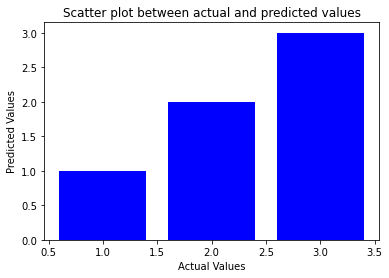

In [27]:
plt.bar(y_test, y_pred2, color='blue')
plt.title('Scatter plot between actual and predicted values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()